In [ ]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

# Code

1.  Apply tSNE to MNIST using any library that you want (not from scratch.) Vary some of the initialization parameters (minimum 4 different parameter combinations)
2.  Plot the results, color by label.

In [ ]:
import six.moves.cPickle as pickle
import gzip
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# load data
def load_data(dataset):
    if not os.path.isfile(dataset):
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
        print('Downloading data from %s' % origin)
        urllib.request.urlretrieve(origin, dataset)

    print('Loading data...')

    # Load the dataset
    with gzip.open(dataset, 'rb') as f:
        try:
            train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
        except:
            train_set, valid_set, test_set = pickle.load(f)

    print('... data has been loaded!')
    return train_set, valid_set, test_set


#Load the data into train, validation and test sets
train_set, val_set, test_set = load_data('mnist.pkl.gz')

#Separate each set into image vector (_x) and label (_y)
train_x, train_y = train_set
val_x, val_y = val_set
test_x, test_y = test_set

Loading data...
... data has been loaded!


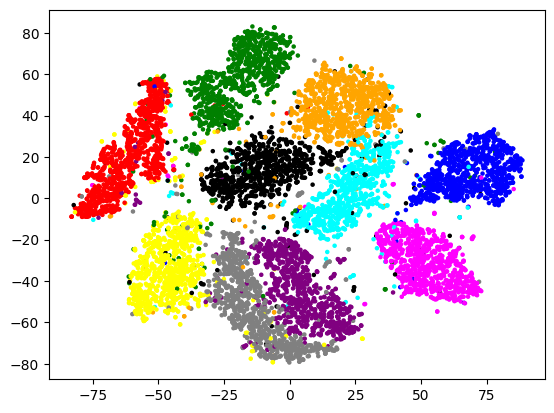

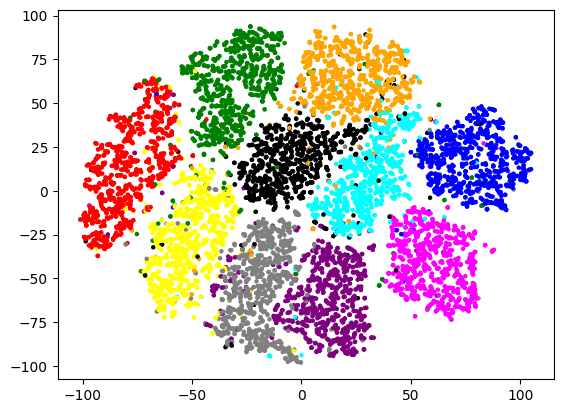

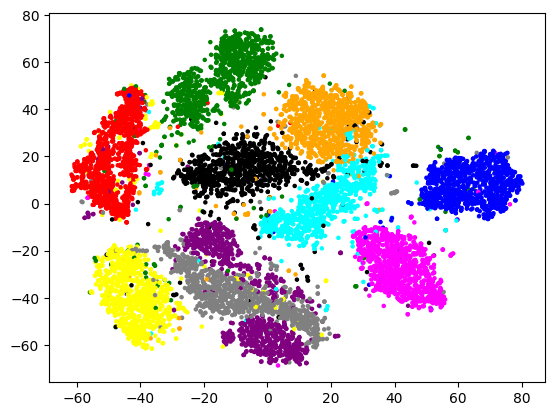

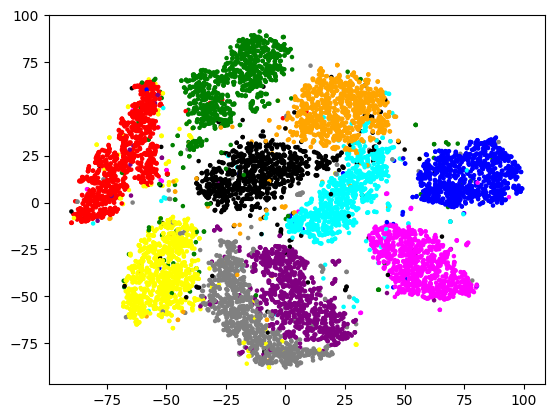

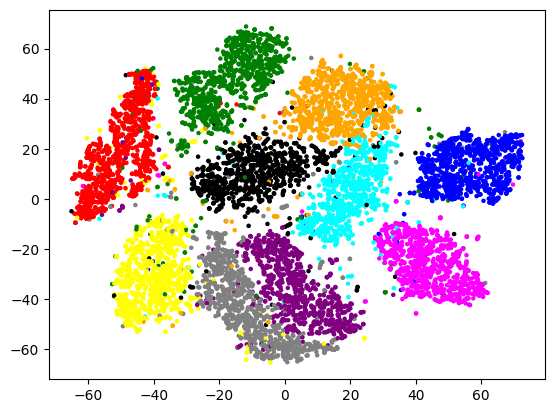

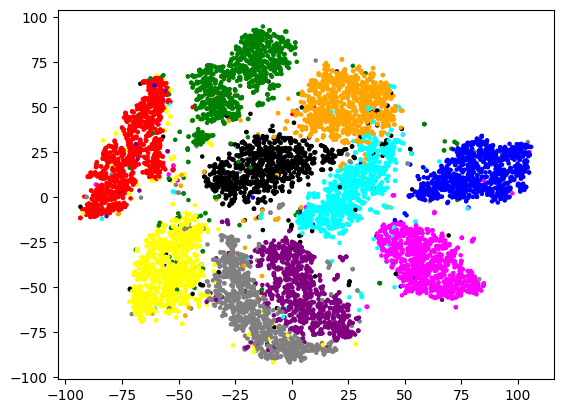

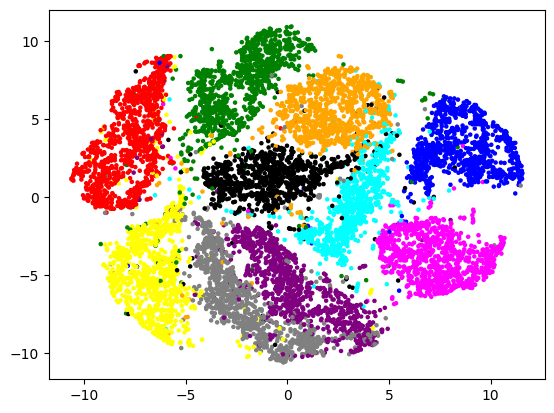

In [ ]:
from sklearn.manifold import TSNE

# tSNE

lr = ['auto','auto','auto',500,100,1000,'auto']
ppl = [30,10,50,30,30,30,30]
mi = [1000,1000,1000,1000,1000,1000,300]

colors = np.array(['blue','red','green','orange','purple','cyan','magenta','yellow','black','gray'])

for lr,ppl,mi in zip(lr,ppl,mi):
  embedded = TSNE(n_components=2, learning_rate=lr, perplexity=ppl, max_iter=mi).fit_transform(test_x)

  plt.scatter(embedded[:,0],embedded[:,1],c=colors[test_y],s=5)
  plt.show()


# Report


1.   What is t-SNE? Explain how it works in general terms, and what parameters you can control before applying it to the data.
2.   What are the advantages and disadvantages of using tSNE in a dataset?
3.   Compared to PCA and LDA, which method has produced the better data partitions? Why?
4.   Explore how parameter choices (perplexity, learning rate, iterations) affect your results. How much impact do they have on the visualization? Is there an a priori criterion to choose them, or is it mostly empirical?
5.   t-SNE is often used for visualization but rarely for downstream tasks (e.g., classification, clustering). Why is that? What limitation prevents t-SNE from being directly useful beyond visualization?
6.   Conclude with some thoughts and things you learned from this homework.

1. tSNE is a none linear dimension reduction method. it computes the similarity in high dimention and low dimention so that it can minimize the difference. parameters like initialization, learning rate, perplexity can be controled

2. it's good for visualization since it's good at capture local structures, but it cost lots of resource for computation.

3. tSNE produced best data partitions because it's none linear dimension reduction, PCA and LDA is linear ones. It maximize to preserves the distance so that the clusters are segmented well.

4. Density inside of each cluster is larger when perplexity value is larger. Learning rate made no much difference for this data, and low max iter made less correct resuts.

5. it's used for mainly visualization because it has some probabistic part so that it always compute different results, and it's global structure might not that correct since it focuses on neighbers.

6. I learned how these parameters affects the results and it's pros and cons. Also this none linear dimention reduction practice was helpful for me to understand more about dimention reduction.
